### Superdense coding

Steps involved:
1. A and B share a bell pair. ( Creating a bell pair--Hadamard(0) and CNOT(0,1)
    A has one qubit of bell pair and B has one qubit
2. A selects 1/4 message (2^2 combinations) to send Bob. Each message has own 
    encoding, unique set of quantum gates added to qubit. 
    00 I
    01 X
    10 Z
    11 ZX
3. A send qubit to B
4. B decodes two bit message, by first adding CNOT gate
    then Hadamard gate to restore the original classical message

### Sending 00

In [1]:
from braket.circuits import Circuit, Gate, Moments
from braket.circuits.instruction import Instruction
from braket.aws import AwsDevice
import matplotlib.pyplot as plt
import time

In [2]:
# making bell pair
circ00=Circuit()
circ00.h([0])
circ00.cnot(0,1)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]))])

In [3]:
# Four possible messages and their corresponding gates
message = {"00": Circuit().i(0),
           "01": Circuit().x(0),
           "10": Circuit().z(0),
           "11": Circuit().x(0).z(0)
          }

In [4]:
# initial message
m="00"

In [6]:
circ00.add_circuit(message[m])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': I('qubit_count': 1), 'target': QubitSet([Qubit(0)]))])

In [7]:
print(circ00)

T  : |0|1|2|
            
q0 : -H-C-I-
        |   
q1 : ---X---

T  : |0|1|2|


In [8]:
# b measures by cnot and then h
circ00.cnot(0,1)
circ00.h([0])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': I('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]))])

In [9]:
print(circ00)

T  : |0|1|2|3|4|
                
q0 : -H-C-I-C-H-
        |   |   
q1 : ---X---X---

T  : |0|1|2|3|4|


In [12]:
from braket.devices import LocalSimulator
## executing on local simulator
device=LocalSimulator()
result = device.run(circ00, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 1000})


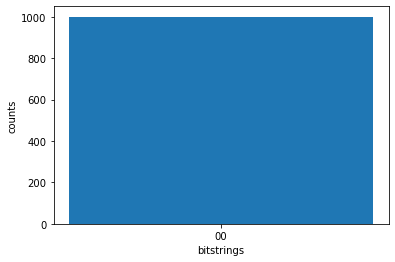

In [13]:
# plot histogram
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

### Sending other messages 01,10,11

In [14]:
circ=Circuit()

In [15]:
circ.h([0])
circ.cnot(0,1)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]))])

In [16]:
m="01"
circ.add_circuit(message[m])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]))])

In [17]:
print(circ)

T  : |0|1|2|
            
q0 : -H-C-X-
        |   
q1 : ---X---

T  : |0|1|2|


In [18]:
circ.cnot(0,1)
circ.h([0])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]))])

In [20]:
device=LocalSimulator()
result = device.run(circ, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'01': 1000})


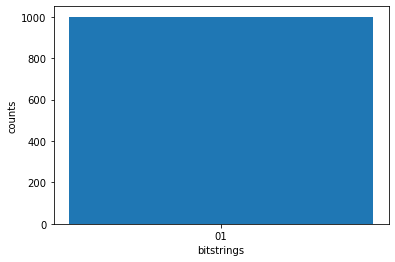

In [21]:
# plot histogram
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [24]:
## message 11
circ=Circuit()
circ.h([0])
circ.cnot(0,1)
m="11"
circ.add_circuit(message[m])
circ.cnot(0,1)
circ.h([0])
print(circ)

T  : |0|1|2|3|4|5|
                  
q0 : -H-C-X-Z-C-H-
        |     |   
q1 : ---X-----X---

T  : |0|1|2|3|4|5|


In [25]:
device=LocalSimulator()
result = device.run(circ, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'11': 1000})


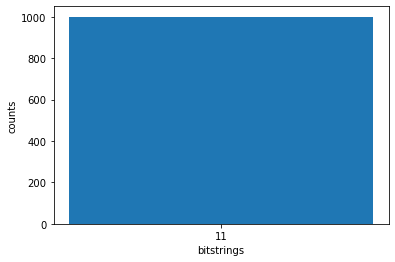

In [26]:
# plot histogram
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');


00	𝐼	|00⟩ + |11⟩	|00⟩ + |10⟩	|00⟩ <br>
01	𝑋	|10⟩ + |01⟩	|11⟩ + |01⟩	|01⟩ <br>
10	𝑍	|00⟩ - |11⟩	|00⟩ - |10⟩	|10⟩ <br>
11	𝑍𝑋	|01⟩ - |10⟩	|01⟩ - |11⟩	|11⟩ <br>